# Logestic Regression
https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

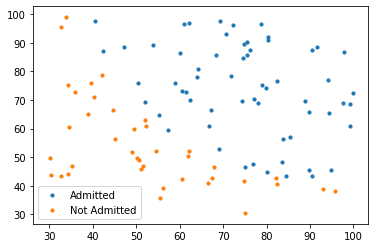

In [78]:
data = pd.read_csv('../datasets/marks.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
admitted = data.loc[y == 1]
not_admitted = data.loc[y == 0]
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()

In [79]:
X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]
B = np.zeros((X.shape[1], 1))

In [115]:
def draw(X, B):
    x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]
    if B[2] == 0:
        B[2] = 1
    y_values = - (B[0] + np.dot(B[1], x_values)) / B[2]

    plt.plot(x_values, y_values, label='Decision Boundary')
    plt.xlabel('Marks in 1st Exam')
    plt.ylabel('Marks in 2nd Exam')
    plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
    plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
    plt.legend()

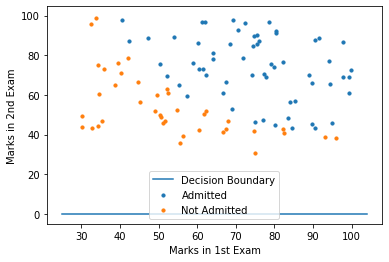

In [116]:
draw(X, B.flatten())

In [82]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

def linear(B, x):
    # Computes the weighted sum of inputs
    return np.dot(x, B)

def probability(B, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(linear(B, x))

In [83]:
def error(B, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(B, x)) + (1 - y) * np.log(
            1 - probability(B, x)))
    return total_cost

def gradient(B, x, y):
    # Computes the gradient of the cost function at the point theta
    n = x.shape[0]
    return (1 / n) * np.dot(x.T, sigmoid(linear(B, x)) - y)

In [84]:
def descent(X, y, B, itr, lr):
    for i in range(itr):
        grad = gradient(B, X, y)
        B -= grad*lr
    return B

In [85]:
new_B = descent(X, y, theta, 500000, 0.005)

In [86]:
new_B

array([[-43.68585195],
       [  0.35489704],
       [  0.35094343]])

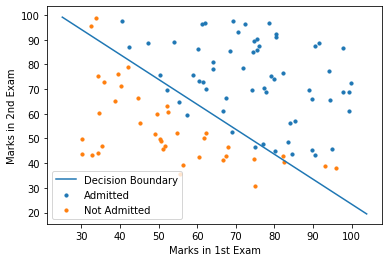

In [87]:
draw(X, new_B.flatten())

In [88]:
error(new_B ,X, y)

0.23665627863399863

In [89]:
error(B ,X, y)

0.6931471805599454